# Read preamble

In [1]:
wld_dir = '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD'
wld_pkg = '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD/WeakLensingDeblending'

In [55]:
import os
os.chdir(wld_dir)

In [38]:
%matplotlib inline

import mycode.tomo.tomo_fncs as tomo_fncs
import mycode.errors as errors
import mycode.preamble as preamble
import mycode.weights as weights 
import mycode.maps as maps 

from tqdm import tqdm 

In [39]:
%run mycode/preamble.py

In [40]:
from importlib import reload
reload(errors)
reload(weights)
reload(preamble)
reload(maps)

<module 'mycode.maps' from '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD/mycode/maps.py'>

# Simulate 

In [28]:
# python WeakLensingDeblending/simulate.py --catalog-name data/OneDegSq.fits --image-width 1800 --image-height 1800\
#                --ra-center -0.05 --dec-center -0.45\
#                --survey-name LSST --filter-band i --output-name data/demo1 --verbose

# python WeakLensingDeblending_ss1/simulate.py --catalog-name data/OneDegSq.fits --image-width 1800 --image-height 1800\
#                --ra-center -0.05 --dec-center -0.45\
#                --survey-name LSST --filter-band i --output-name data/demo1_ss1 --verbose

# python WeakLensingDeblending_ssz1/simulate.py --catalog-name data/OneDegSq.fits --image-width 1800 --image-height 1800\
#                --ra-center -0.05 --dec-center -0.45\
#                --survey-name LSST --filter-band i --output-name data/demo1_ssz1 --verbose --calculate-bias

CompletedProcess(args=' ./WeakLensingDeblending/simulate.py --catalog-name data/OneDegSq.fits --image-width 1800 --image-height 1800               --ra-center -0.05 --dec-center -0.45               --survey-name LSST --filter-band i --output-name data/demo1 --verbose', returncode=0)

In [57]:
"""
Calculate bias too
"""
# !bsub -W "05:00" -o "output.txt" -r "python WeakLensingDeblending/simulate.py --catalog-name data/OneDegSq.fits --image-width 1800 --image-height 1800\
#                --ra-center -0.05 --dec-center -0.45\
#                --survey-name LSST --filter-band i --output-name data/demo2 --verbose --calculate-bias"

!bsub -W "05:00" -o "output.txt" -r "python WeakLensingDeblending_ss1/simulate.py --catalog-name data/OneDegSq.fits --image-width 1800 --image-height 1800\
               --ra-center -0.05 --dec-center -0.45\
               --survey-name LSST --filter-band i --output-name data/demo2_ss --verbose --calculate-bias"

!bsub -W "05:00" -o "output.txt" -r "python WeakLensingDeblending_ssz1/simulate.py --catalog-name data/OneDegSq.fits --image-width 1800 --image-height 1800\
               --ra-center -0.05 --dec-center -0.45\
               --survey-name LSST --filter-band i --output-name data/demo2_ssz --verbose --calculate-bias"

Job <681378> is submitted to default queue <medium>.
Job <681385> is submitted to default queue <medium>.


In [ ]:
"""
Result in memory errors
"""

# subprocess.run(f"python WeakLensingDeblending/simulate.py --catalog-name data/OneDegSq.fits --image-width 12000 --image-height 12000\
#                --ra-center 0 --dec-center 0\
#                --survey-name LSST --filter-band i --output-name data/demo2 --verbose",shell=True)

# subprocess.run(f"python WeakLensingDeblending_ss1/simulate.py --catalog-name data/OneDegSq.fits --image-width 12000 --image-height 12000\
#                --ra-center 0 --dec-center 0\
#                --survey-name LSST --filter-band i --output-name data/demo2_ss1 --verbose",shell=True)

# python WeakLensingDeblending/simulate.py --catalog-name data/OneDegSq.fits --image-width 18000 --image-height 18000\
#                --ra-center 0 --dec-center 0\
#                --survey-name LSST --filter-band i --output-name data/demo3 --verbose

# python WeakLensingDeblending_ss1/simulate.py --catalog-name data/OneDegSq.fits --image-width 18000 --image-height 18000\
#                --ra-center 0 --dec-center 0\
#                --survey-name LSST --filter-band i --output-name data/demo3_ss1 --verbose

# Read catalogues 

In [6]:
#filters to apply as reading the catalogue. 
prefilters = [
    maps.get_non_duplicated_cat
]


ffilters = [maps.good, maps.best]

In [7]:
#default step size
cat_name1 = "final_fitsLSST7"
main_catsLSST = maps.retrieve_cats("final_fitsLSST", only_zero_shear=True)
pfmain_catsLSST = maps.get_filter_cats(main_catsLSST, prefilters)
cat1 = pfmain_catsLSST[0]

scat1 = maps.get_filter_cats(pfmain_catsLSST, ffilters)[0]

retrieving zero shear cat from default step size catalogue...


In [8]:
#0.001 step size
cat_name2 = "final_fitsLSST5_ss1"
main_catsLSST_ss1 = maps.retrieve_cats("final_fitsLSST_ss", only_zero_shear=True)
pfmain_catsLSST_ss1 = maps.get_filter_cats(main_catsLSST_ss1, prefilters)
cat2 = pfmain_catsLSST_ss1[0]

scat2 = maps.get_filter_cats(pfmain_catsLSST_ss1, ffilters)[0]

retrieving zero shear cat from step size .001 catalogue...


In [28]:
#small 1800x1800 box. 
demo1 = Table.read("data/demo1.fits")
demo1_ss = Table.read("data/demo1_ss1.fits")
demo1_ssz = Table.read("data/demo1_ssz1.fits")

print(f"Number of galaxies: {len(demo1)}")

Number of galaxies: 8782


In [73]:
#small 1800x1800 box. 
demo2 = Table.read("data/demo2.fits")
demo2_ss = Table.read("data/demo2_ss.fits")
demo2_ssz = Table.read("data/demo2_ssz.fits")

print(f"Number of galaxies: {len(demo1)}")

Number of galaxies: 8782


# Does step size of size change anything important? 

(0, 1000.0)

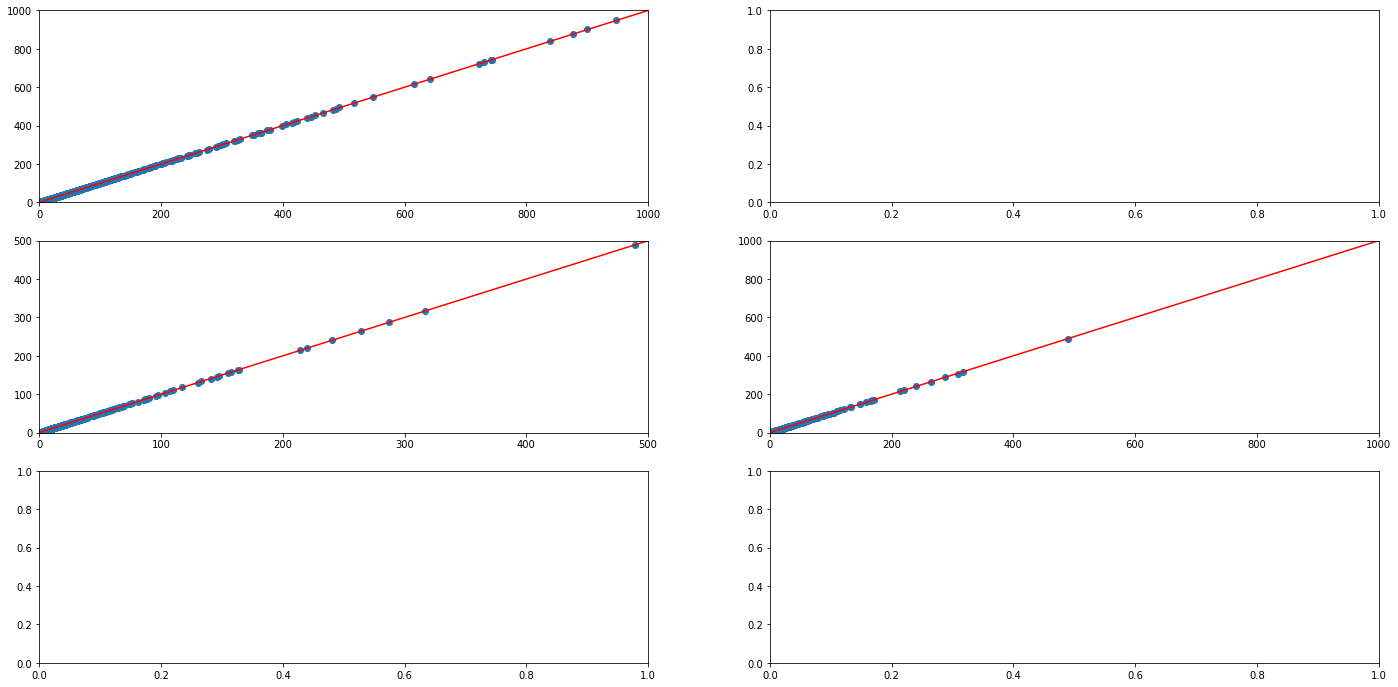

In [54]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(24, 12))
ax1,ax2,ax3,ax4, ax5, ax6  = axs.flatten()

ax1.scatter(demo1['snr_grpf'], demo1_ssz['snr_grpf'])
ax1.plot([0,1e10],[0,1e10], c='r')
ax1.set_xlim(0, 1e3)
ax1.set_ylim(0, 1e3)

ax3.scatter(demo1['dg1'], demo1_ssz['dg1'])
ax3.plot([0,1e10],[0,1e10], c='r')
ax3.set_xlim(0, 500)
ax3.set_ylim(0, 500)

ax4.scatter(demo1['dg1_grp'], demo1_ssz['dg1_grp'])
ax4.plot([0,1e10],[0,1e10], c='r')
ax4.set_xlim(0, 1e3)
ax4.set_ylim(0, 1e3)

ax5.scatter(demo1['bias_g1'], demo1_ssz['bias_g1'])
ax5.plot([0,1e10],[0,1e10], c='r')
ax5.set_xlim(0, 1e3)
ax5.set_ylim(0, 1e3)

ax6.scatter(demo1['bias_g1_grp'], demo1_ssz['bias_g1_grp'])
ax6.plot([0,1e10],[0,1e10], c='r')
ax6.set_xlim(0, 1e3)
ax6.set_ylim(0, 1e3)


# Condition numbers cuts

## Get condition numbers 

In [9]:
from WeakLensingDeblending import descwl as descwl
from WeakLensingDeblending_ss1 import descwl as descwl_ss

In [10]:
grps1 = list(set(demo1['grp_id'])); grps1.sort() 
grps2 = list(set(demo1_ss['grp_id'])); grps2.sort() 
assert list(demo1['db_id']) == list(demo1_ss['db_id']), 'galaxies present are not the same!'
assert grps1 == grps2, "The groups are not the same, what!"
grps = np.array(grps1)

In [11]:
grp_sizes = np.array(maps.get_group_sizes(demo1, grps))

In [12]:
fish_matrices1 = maps.get_fish_matrices("data/demo1.fits", grps, descwl, only_fish=True)
fish_matrices2 = maps.get_fish_matrices("data/demo1_ss1.fits", grps, descwl_ss, only_fish=True)

In [13]:
#calculate condition numbers. 
conds1 = np.array([np.linalg.cond(fish) for fish in fish_matrices1])
conds2 = np.array([np.linalg.cond(fish) for fish in fish_matrices2])

<font size="3"> **Histogram of condition numbers on our 1/100th of a square deg patch.** </font> 

<IPython.core.display.Javascript object>


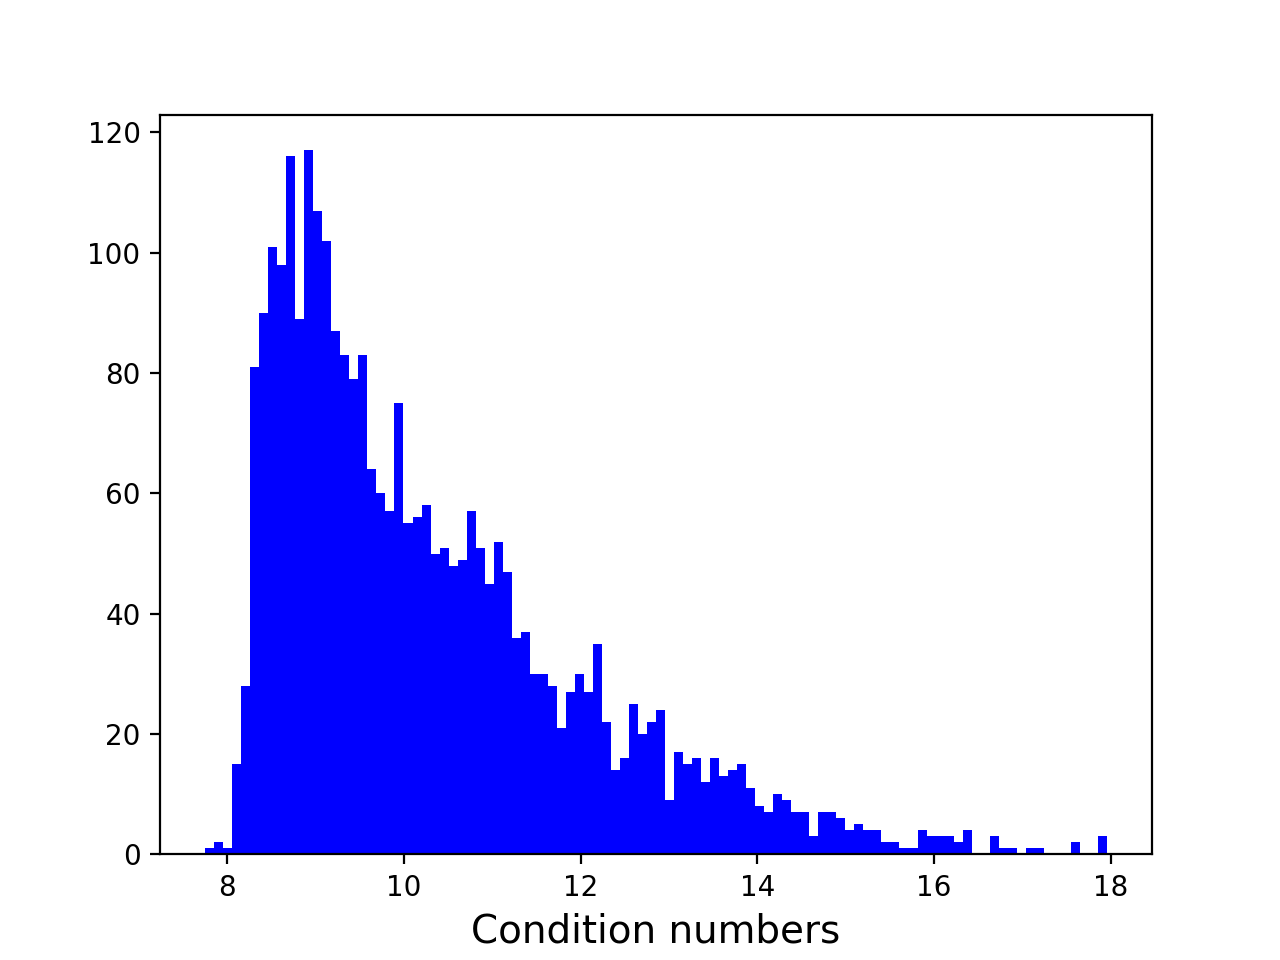

In [33]:
plt.hist(np.log10(conds1[conds1 < np.inf]), bins =100, color='b');
plt.xlabel("Condition numbers", fontsize=14);
plt.show()

<font size="3"> The condition numbers seem to be the same between the two step sizes on shape: </font>

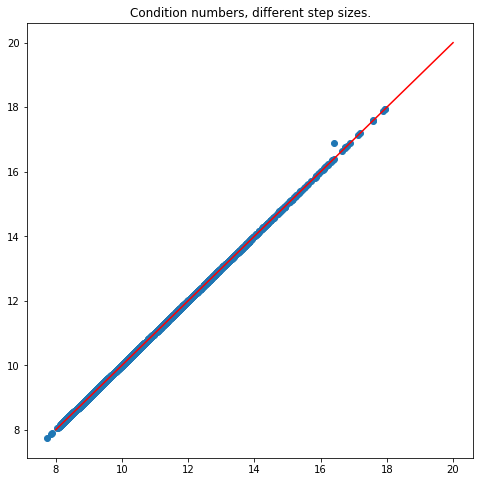

In [72]:
plt.figure(figsize=(8,8))
plt.scatter(np.log10(conds1), np.log10(conds2))
plt.plot([8,20],[8,20], color='r')
# plt.xlim(1,1e14)
# plt.ylim(1,1e14)
plt.title("Condition numbers, different step sizes."); 

## group sizes and condition numbers 

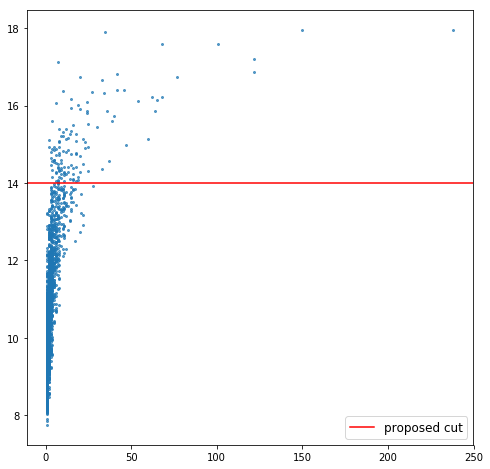

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(grp_sizes, np.log10(conds1), alpha = 0.7, s=4)

plt.axhline(14, c='r', label='proposed cut')
plt.legend(prop={'size': 12})

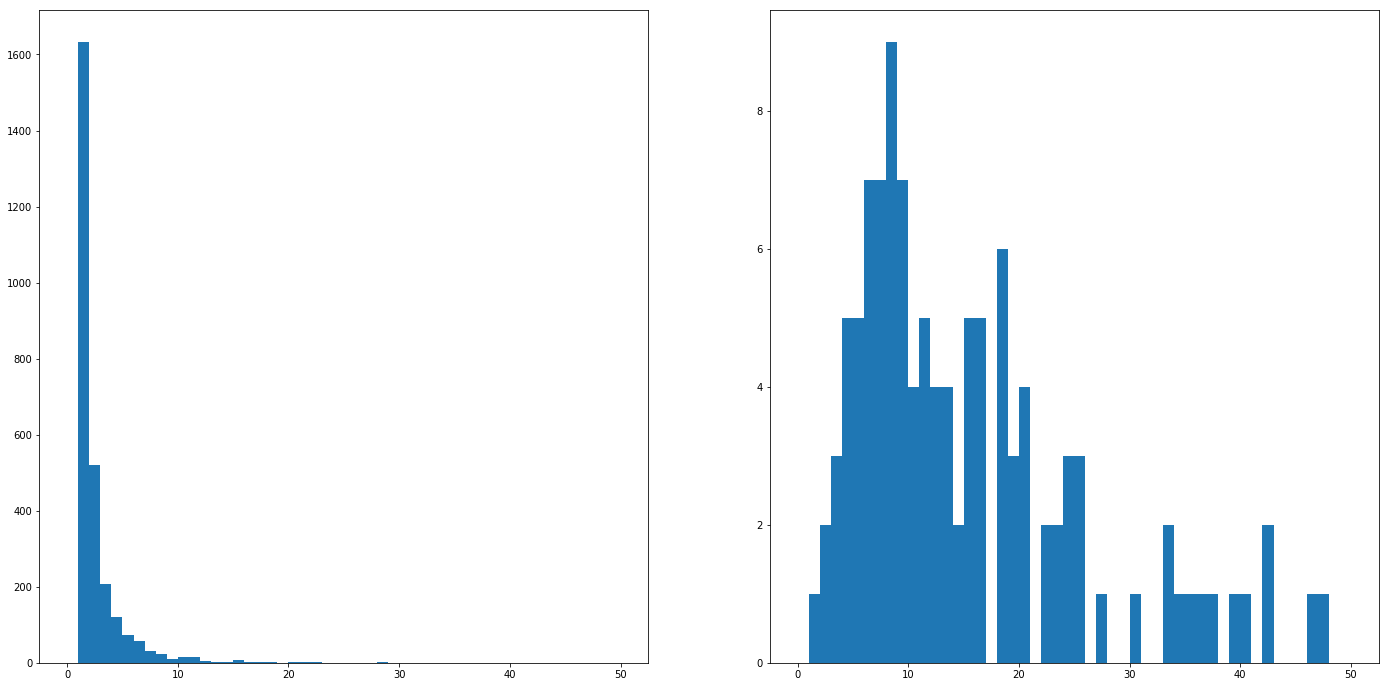

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24,12))
ax1, ax2 = axs
ax1.hist(grp_sizes[conds1 < 1e14], bins=50, range=[0,50]);
ax2.hist(grp_sizes[conds1 > 1e14], bins=50, range=[0,50]);

## Condition numbers and biases 

In [59]:
#catalogue that includes all the galaxies in cat1 that hare in demo1/demo1_ss. 

bool_arr = [ (grp_id in grps) for grp_id in cat1['grp_id']] #grps is for the patch we are investigating. 
acat1 = cat1[bool_arr] 
acat1.sort(maps.dflt_sorting)
len(acat1)

7961

## all galaxies 

<font size=3> **Plot mean shape grp bias of each group vs. condition number** </font>

In [60]:
grpid_hash = maps.get_hash(acat1, 'grp_id')
grps_acat1_set = set(acat1['grp_id'])

grps_acat1 = [grp for grp in grps if grp in grps_acat1_set]

bool_arr_grps = [(grp in grps) for grp in acat1['grp_id']]

acat1_new = acat1[bool_arr_grps]

In [61]:
conds_acat1 = np.array([cond for i,cond in enumerate(conds1) if grps[i] in grps_acat1_set])

max_biases_acat1 = np.array([ np.max(acat1['bias_g1_grp'][grpid_hash[grp]]) for grp in grps if grp in grps_acat1_set])

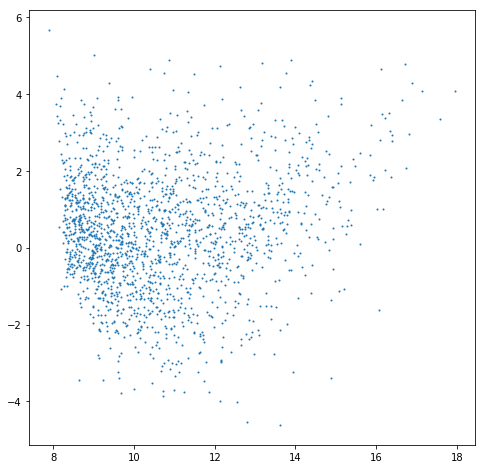

In [64]:
plt.figure(figsize=(8,8))
bool_arr = (max_biases_acat1 > 0) 
plt.scatter(np.log10(conds_acat1[bool_arr]), np.log10(np.abs(max_biases_acat1[bool_arr])), s=1)
# bool_arr2 = (max_biases_acat1 > 1) & (np.log10(conds_acat1)< 13) 
# plt.scatter(np.log10(conds_acat1[bool_arr2]), np.log10(np.abs(max_biases_acat1[bool_arr2])))

<font size="3"> **What are these orange galaxies like?** </font> 

In [116]:
bool_arr3 = []
for grp in acat1_new['grp_id']:
    idx = grps_acat1.index(grp)
    bl = np.log10(conds_acat1[idx]) < 13 and np.abs(mean_biases_acat1[idx]) > 1
    bool_arr3.append(bl)
bool_arr3 = np.array(bool_arr3)

In [119]:
acat1_new2 = maps.good(maps.best(acat1_new[bool_arr3]))

(-3, 3)

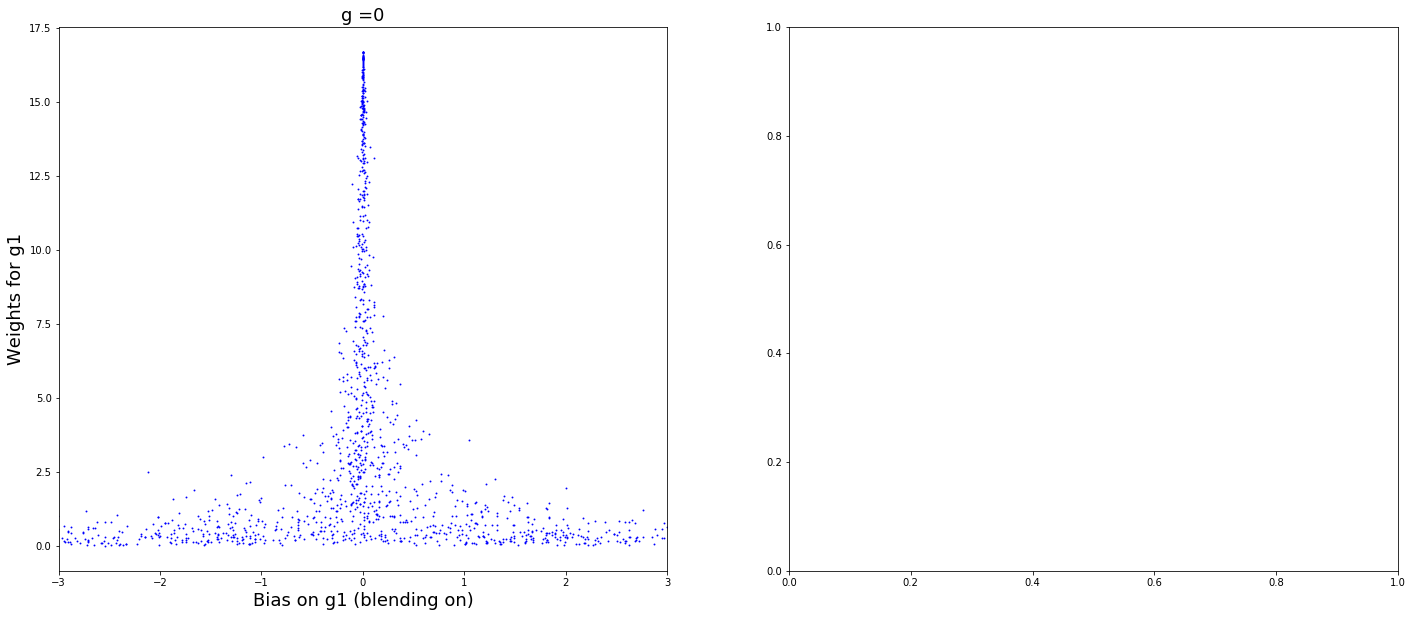

In [142]:
#orange galaxies. 
fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(24,10)) 
ax1, ax2 = axs.flatten() 

weights1 = weights.get_weights(acat1_new[bool_arr3], '1', 'grp')
ax1.scatter(acat1_new[bool_arr3]['bias_g1_grp'], weights1, alpha=1, s=0.8, c='b')
ax1.set_title('g =0', size = 18)
ax1.set_xlabel('Bias on g1 (blending on)', size=18)
ax1.set_ylabel('Weights for g1', size=18)
ax1.set_xlim(-3, 3)

## Selected galaxies 

In [68]:
grpid_hash = maps.get_hash(scat1, 'grp_id')
grps_scat1_set = set(scat1['grp_id'])
grps_scat1 = [grp for grp in grps if grp in grps_scat1_set]
bool_arr_grps = [(grp in grps) for grp in scat1['grp_id']]
scat1_new = scat1[bool_arr_grps]

In [69]:
conds_scat1 = np.array([cond for i,cond in enumerate(conds1) if grps[i] in grps_scat1_set])

max_biases_scat1 = np.array([ np.max(scat1['bias_g1_grp'][grpid_hash[grp]]) for grp in grps if grp in grps_scat1_set])

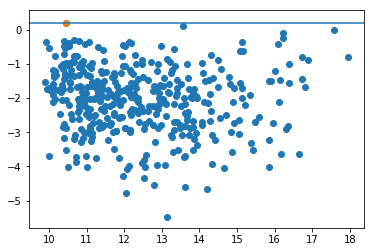

In [70]:
bool_arr = (max_biases_scat1 > 0) 
plt.scatter(np.log10(conds_scat1[bool_arr]), np.log10(np.abs(max_biases_scat1[bool_arr])))
bool_arr2 = (max_biases_scat1 > 1) & (np.log10(conds_scat1)< 13) 
plt.scatter(np.log10(conds_scat1[bool_arr2]), np.log10(np.abs(max_biases_scat1[bool_arr2])))
plt.axhline(0.2)

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.13118e+05]),
 array([-129608.195 , -116543.52  , -103478.84  ,  -90414.17  ,
         -77349.49  ,  -64284.816 ,  -51220.14  ,  -38155.47  ,
         -25090.791 ,  -12026.116 ,    1038.5594], dtype=float32),
 <a list of 10 Patch objects>)

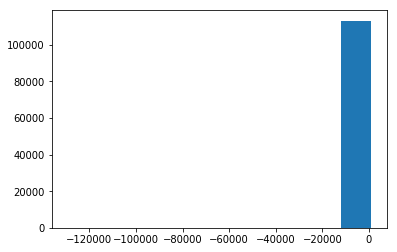

In [66]:
plt.hist(scat1['bias_g1_grp'])

# New weigth plots with cuts

In [160]:
good_grps = np.array(grps)[conds1<1e14]
bool_arr = [ (grp_id in good_grps) for grp_id in scat1['grp_id']]

In [ ]:
good_grps = np.array(grps)[conds1<1e14]


In [173]:
bool_arr1 = [ (grp_id in good_grps) for grp_id in scat1['grp_id']]
bool_arr2 = [ (grp_id in good_grps) for grp_id in scat2['grp_id']]
sscat1 = scat1[bool_arr1]
sscat2 = scat2[bool_arr2]

In [177]:
bool_arr1 = [ (not grp_id in good_grps and grp_id in grps) for grp_id in scat1['grp_id']]
bool_arr2 = [ (not grp_id in good_grps and grp_id in grps) for grp_id in scat2['grp_id']]
bscat1 = scat1[bool_arr1]
bscat2 = scat2[bool_arr2]

In [182]:
bool_arr = [grp_id in grps for grp_id in scat1['grp_id']]
ascat1 = scat1[bool_arr]
len(ascat)

1170

In [178]:
len(bscat1)

360

In [183]:
len(sscat1)

810

In [153]:
len(scat1)

113120

(-3, 3)

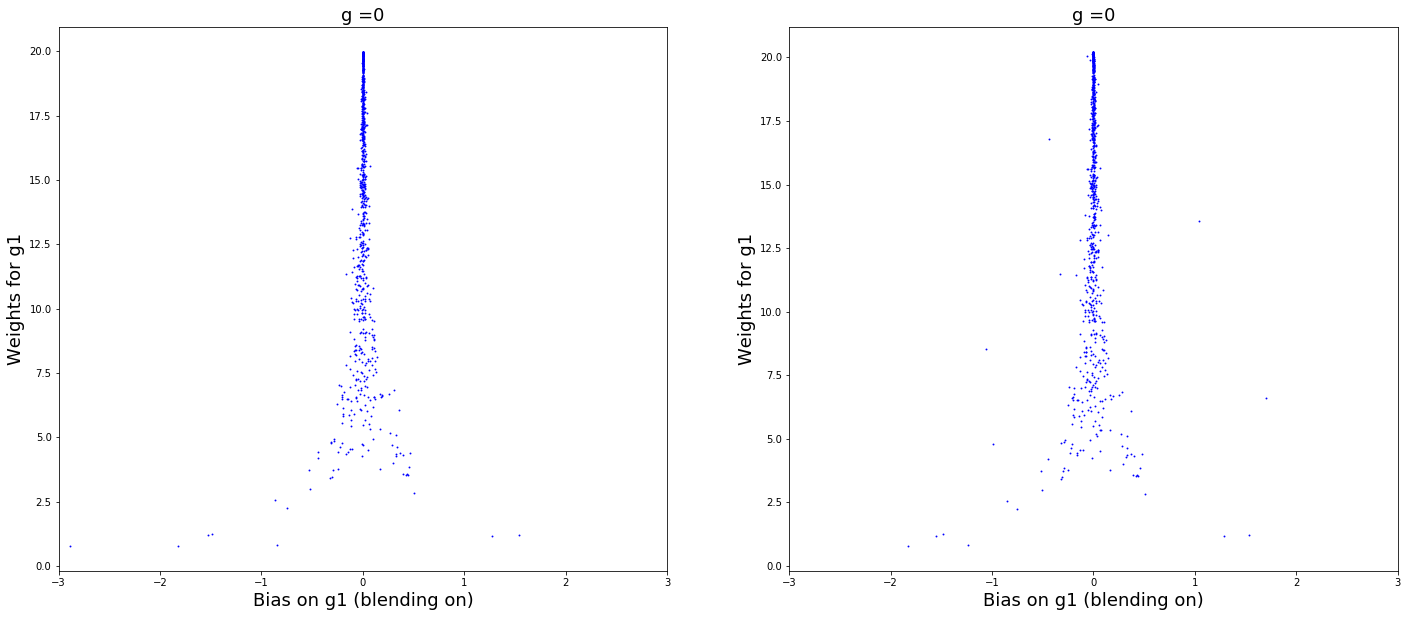

In [169]:
fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(24,10)) 
ax1, ax2 = axs.flatten() 

weights1 = weights.get_weights(sscat1, '1', 'grp')
ax1.scatter(sscat1['bias_g1_grp'], weights1, alpha=1, s=0.8, c='b')
ax1.set_title('g =0', size = 18)
ax1.set_xlabel('Bias on g1 (blending on)', size=18)
ax1.set_ylabel('Weights for g1', size=18)
ax1.set_xlim(-3, 3)

weights2 = weights.get_weights(sscat2, '1', 'grp')
ax2.scatter(sscat2['bias_g1_grp'], weights2, alpha=1, s=0.8, c='b')
ax2.set_title('g =0', size = 18)
ax2.set_xlabel('Bias on g1 (blending on)', size=18)
ax2.set_ylabel('Weights for g1', size=18)
ax2.set_xlim(-3, 3)

(-3, 3)

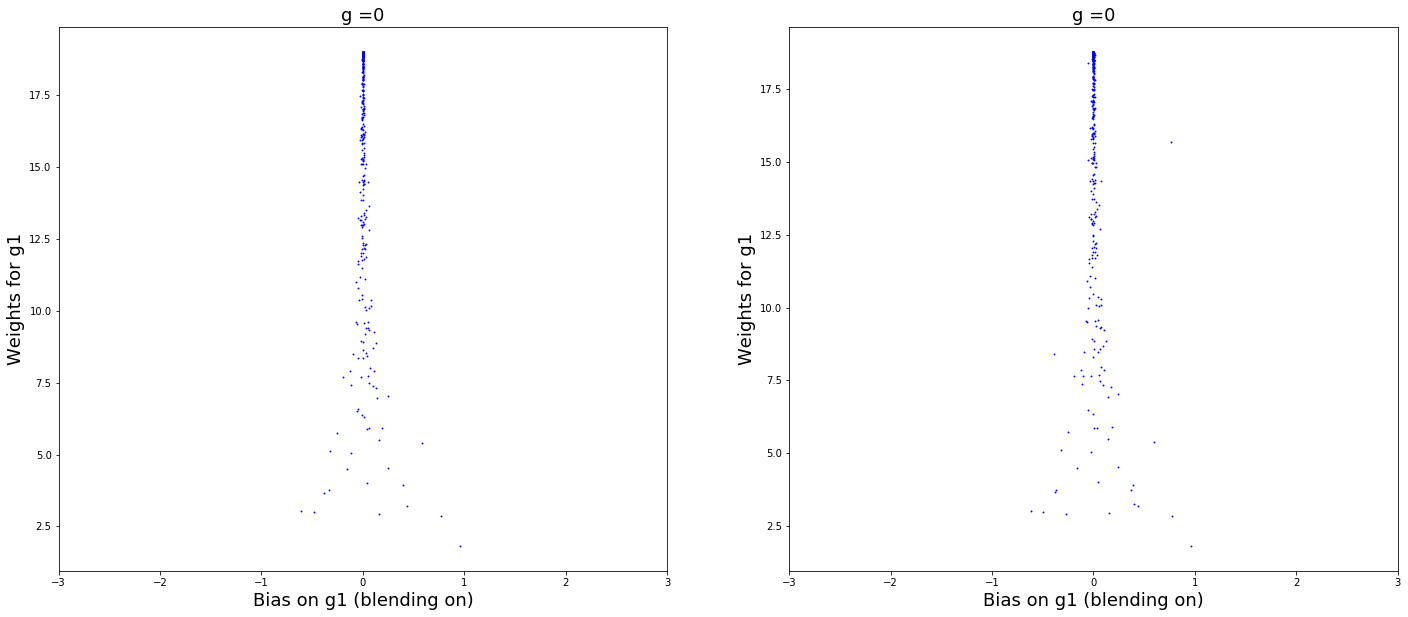

In [179]:
fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(24,10)) 
ax1, ax2 = axs.flatten() 

weights1 = weights.get_weights(bscat1, '1', 'grp')
ax1.scatter(bscat1['bias_g1_grp'], weights1, alpha=1, s=0.8, c='b')
ax1.set_title('g =0', size = 18)
ax1.set_xlabel('Bias on g1 (blending on)', size=18)
ax1.set_ylabel('Weights for g1', size=18)
ax1.set_xlim(-3, 3)

weights2 = weights.get_weights(bscat2, '1', 'grp')
ax2.scatter(bscat2['bias_g1_grp'], weights2, alpha=1, s=0.8, c='b')
ax2.set_title('g =0', size = 18)
ax2.set_xlabel('Bias on g1 (blending on)', size=18)
ax2.set_ylabel('Weights for g1', size=18)
ax2.set_xlim(-3, 3)

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(24,10)) 
ax1, ax2 = axs.flatten() 

weights1 = weights.get_weights(sscat1, '1', 'grp')
ax1.scatter(sscat1['bias_g1_grp'], weights1, alpha=1, s=0.8, c='b')
ax1.set_title('g =0', size = 18)
ax1.set_xlabel('Bias on g1 (blending on)', size=18)
ax1.set_ylabel('Weights for g1', size=18)
ax1.set_xlim(-3, 3)

weights2 = weights.get_weights(sscat2, '1', 'grp')
ax2.scatter(sscat2['bias_g1_grp'], weights2, alpha=1, s=0.8, c='b')
ax2.set_title('g =0', size = 18)
ax2.set_xlabel('Bias on g1 (blending on)', size=18)
ax2.set_ylabel('Weights for g1', size=18)
ax2.set_xlim(-3, 3)

In [170]:
bool_arr1 = [ (grp_id in grps) for grp_id in scat1['grp_id']]
bool_arr2 = [ (grp_id in grps) for grp_id in scat2['grp_id']]
dcat1 = scat1[bool_arr1]
dcat2 = scat2[bool_arr2]

In [172]:
demo1

1170

(-3, 3)

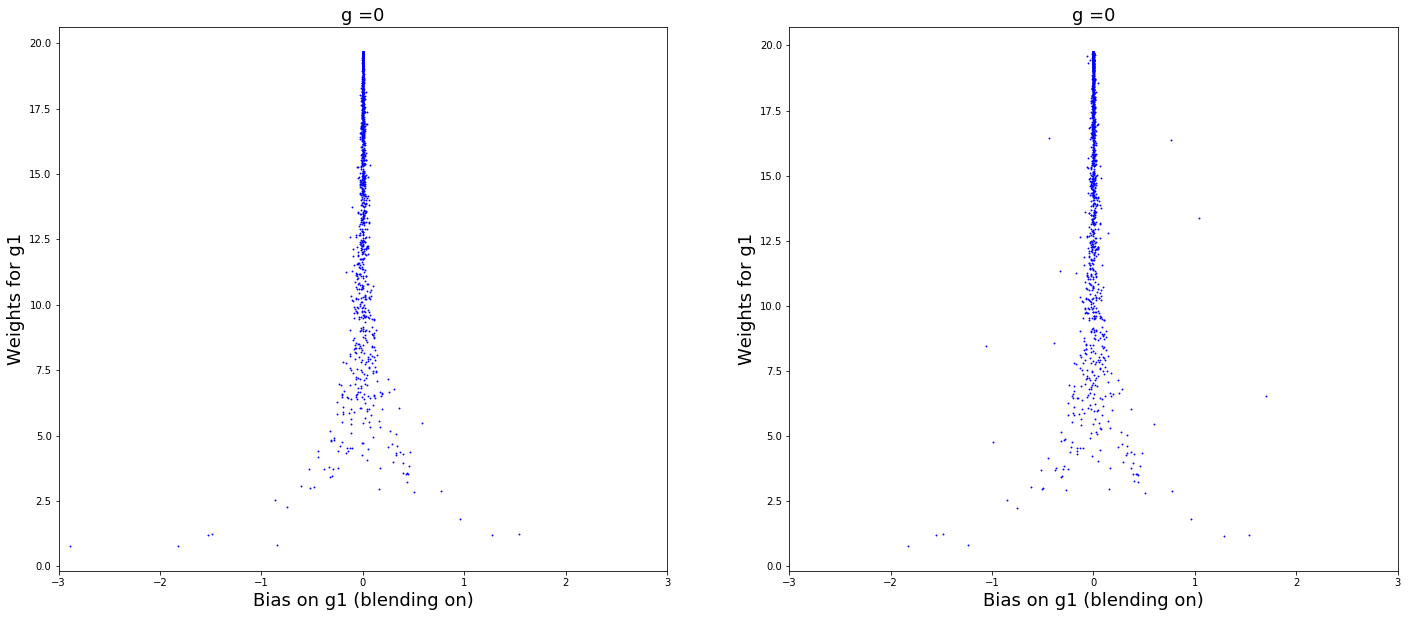

In [171]:
fig, axs = plt.subplots(ncols=2, nrows = 1, figsize=(24,10)) 
ax1, ax2 = axs.flatten() 

weights1 = weights.get_weights(dcat1, '1', 'grp')
ax1.scatter(dcat1['bias_g1_grp'], weights1, alpha=1, s=0.8, c='b')
ax1.set_title('g =0', size = 18)
ax1.set_xlabel('Bias on g1 (blending on)', size=18)
ax1.set_ylabel('Weights for g1', size=18)
ax1.set_xlim(-3, 3)

weights2 = weights.get_weights(dcat2, '1', 'grp')
ax2.scatter(dcat2['bias_g1_grp'], weights2, alpha=1, s=0.8, c='b')
ax2.set_title('g =0', size = 18)
ax2.set_xlabel('Bias on g1 (blending on)', size=18)
ax2.set_ylabel('Weights for g1', size=18)
ax2.set_xlim(-3, 3)

# Precision of python?

In [123]:
print('{0:.20g}'.format(0.1))

0.10000000000000000555


In [124]:
1e-12 + 1e-27

1.000000000000001e-12

In [133]:
1e-20 + 1e-36

1.0000000000000001e-20

Somewhere between `1e-15` and `1e-18`? 